In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polyplotter as pp
from scipy.optimize import curve_fit
from functools import partial

In [2]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230310_Al_70z_S11_complex_hires.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [3]:
smooth_f = np.linspace(freqs[0], freqs[-1], 1000)
theory = pp.linear_resonator(smooth_f, freqs[np.argmin(np.abs(s11))], 5000, 0.3)
fake_data = pp.linear_resonator(freqs, freqs[np.argmin(np.abs(s11))], 8000, 0.3) + 0.05*(np.random.random(size=freqs.size)-0.5) + 1j*0.05*(np.random.random(size=freqs.size)-0.5)

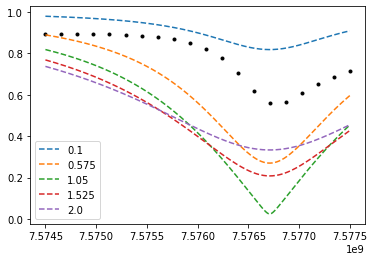

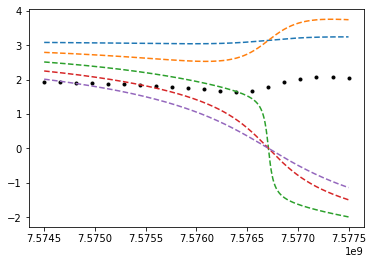

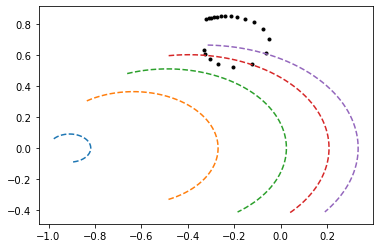

In [8]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax1.plot(freqs, np.abs(s11), 'k.')
ax2.plot(freqs, np.unwrap(np.angle(s11)), 'k.')
ax3.plot(np.real(s11), np.imag(s11), 'k.')

for beta in np.linspace(0.1, 2, 5):
    theory = pp.linear_resonator(smooth_f, freqs[np.argmin(np.abs(s11))], 5000, beta)
    ax1.plot(smooth_f, np.abs(theory), '--', label=beta)
    ax2.plot(smooth_f, np.unwrap(np.angle(theory)), '--')
    ax3.plot(np.real(theory), np.imag(theory), '--')
ax1.legend()

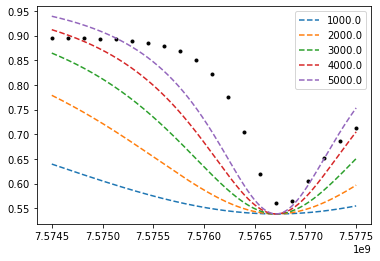

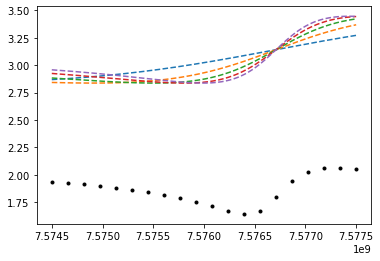

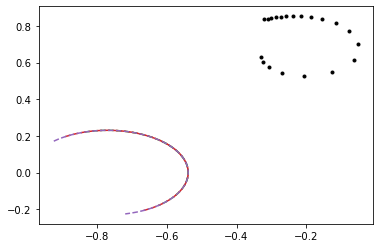

In [5]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax1.plot(freqs, np.abs(s11), 'k.')
ax2.plot(freqs, np.unwrap(np.angle(s11)), 'k.')
ax3.plot(np.real(s11), np.imag(s11), 'k.')

for Q in np.linspace(1000, 5000, 5):
    theory = pp.linear_resonator(smooth_f, freqs[np.argmin(np.abs(s11))], Q, 0.3)
    ax1.plot(smooth_f, np.abs(theory), '--', label=Q)
    ax2.plot(smooth_f, np.unwrap(np.angle(theory)), '--')
    ax3.plot(np.real(theory), np.imag(theory), '--')
ax1.legend()

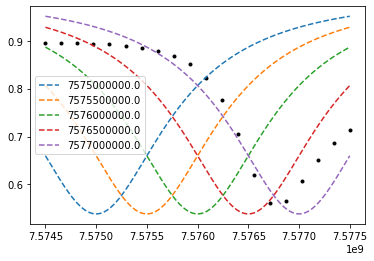

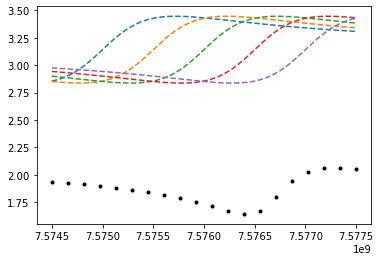

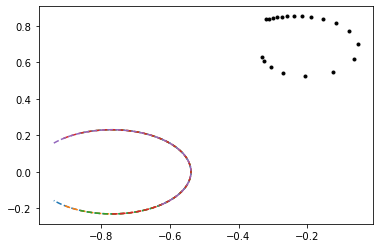

In [6]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax1.plot(freqs, np.abs(s11), 'k.')
ax2.plot(freqs, np.unwrap(np.angle(s11)), 'k.')
ax3.plot(np.real(s11), np.imag(s11), 'k.')

for f_0 in np.linspace(7.575e9, 7.577e9, 5):
    theory = pp.linear_resonator(smooth_f, f_0, 5000, 0.3)
    ax1.plot(smooth_f, np.abs(theory), '--', label=f_0)
    ax2.plot(smooth_f, np.unwrap(np.angle(theory)), '--')
    ax3.plot(np.real(theory), np.imag(theory), '--')
ax1.legend()

1.0
1.0
1.0
1.0
1.0


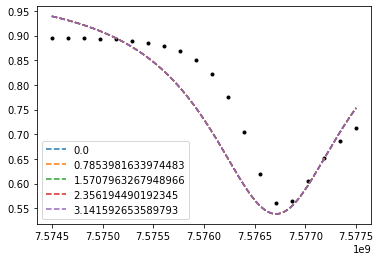

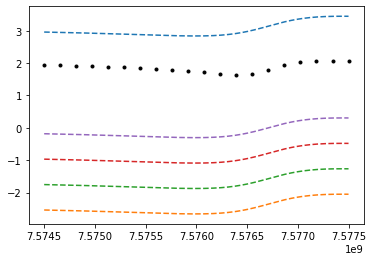

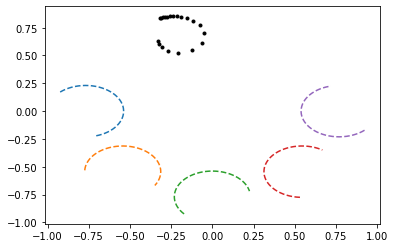

In [7]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax1.plot(freqs, np.abs(s11), 'k.')
ax2.plot(freqs, np.unwrap(np.angle(s11)), 'k.')
ax3.plot(np.real(s11), np.imag(s11), 'k.')

for phi in np.linspace(0, np.pi, 5):
    theory = pp.linear_resonator(smooth_f, freqs[np.argmin(np.abs(s11))], Q, 0.3)
    eta_r = np.cos(phi)
    eta_i = 1j*np.sin(phi)
    theory *= eta_r + eta_i
    print(np.abs(eta_r+eta_i))
    ax1.plot(smooth_f, np.abs(theory), '--', label=phi)
    ax2.plot(smooth_f, np.unwrap(np.angle(theory)), '--')
    ax3.plot(np.real(theory), np.imag(theory), '--')
ax1.legend()

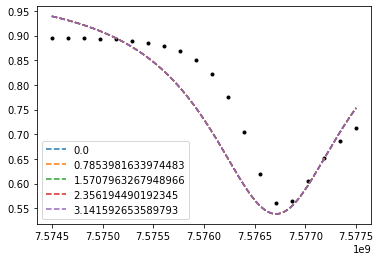

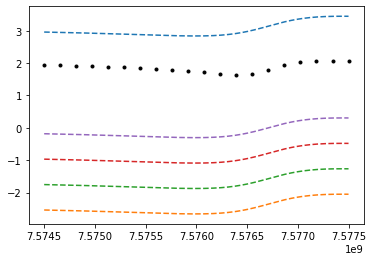

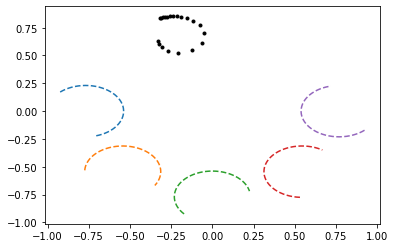

In [9]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax1.plot(freqs, np.abs(s11), 'k.')
ax2.plot(freqs, np.unwrap(np.angle(s11)), 'k.')
ax3.plot(np.real(s11), np.imag(s11), 'k.')

for dphase in np.linspace(0, np.pi, 5):
    theory = pp.linear_resonator(smooth_f, freqs[np.argmin(np.abs(s11))], Q, 0.3)
    tmag = np.abs(theory)
    tphase = np.unwrap(np.angle(theory))
    tphase += dphase
    theory = tmag * np.exp(1j*tphase)
    ax1.plot(smooth_f, np.abs(theory), '--', label=dphase)
    ax2.plot(smooth_f, np.unwrap(np.angle(theory)), '--')
    ax3.plot(np.real(theory), np.imag(theory), '--')
ax1.legend()

In [35]:
def residuals(f, *args, func=None, data=None):
    return np.abs(data-func(f, *args))**2

def resonator_fit(freqs, data, func, p0, plot=True):
    popt, pcov = curve_fit(partial(residuals, data=data, func=func), freqs, 0*freqs, p0=p0)
    if plot:
        plot_data_fit(freqs, data, func, popt)
    return popt

def plot_data_fit(x, data, fitf, popt):
    plt.figure()
    smooth_x = np.linspace(x[0], x[-1], 10000)
    fit = fitf(smooth_x, *popt)
    fit_pts = fitf(x, *popt)
    f1 = plt.figure()
    ax1 = f1.subplots()
    f2 = plt.figure()
    ax2 = f2.subplots()
    f3 = plt.figure()
    ax3 = f3.subplots()
    axs = (ax1, ax2, ax3)
    plot_complex(x, data, fmt='k.', axs=axs)
    plot_complex(smooth_x, fit, fmt='r--', axs=axs)
    
def plot_complex(x, data, fmt='k.', axs=None):
    if axs is None:
        f1 = plt.figure()
        ax1 = f1.subplots()
        f2 = plt.figure()
        ax2 = f2.subplots()
        f3 = plt.figure()
        ax3 = f3.subplots()
    else:
        ax1, ax2, ax3 = axs
    ax1.plot(x, np.abs(data), fmt)
    ax2.plot(x, np.unwrap(np.angle(data)), fmt)
    ax3.plot(np.real(data), np.imag(data), fmt)

array([7.77100454e+09, 7.92621377e+03, 3.02379654e-01])

<Figure size 432x288 with 0 Axes>

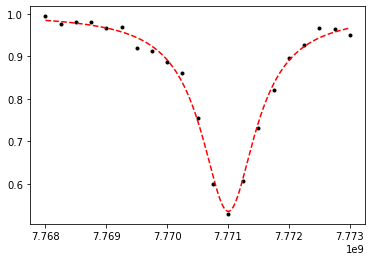

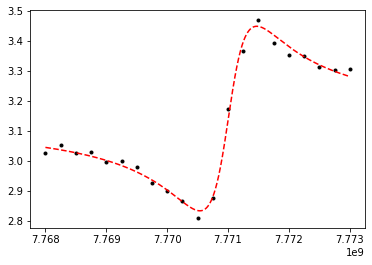

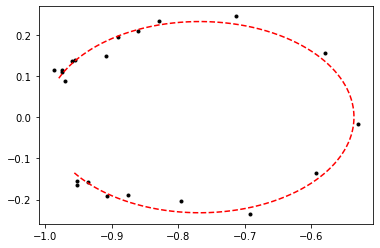

In [36]:
resonator_fit(freqs, fake_data, p0=[7.77655e9, 5000, 0.1], func=pp.linear_resonator)

array([ 7.77104823e+09,  9.62265677e+03,  2.30239243e-01, -2.73242181e-02,
       -1.60383427e+00])

<Figure size 432x288 with 0 Axes>

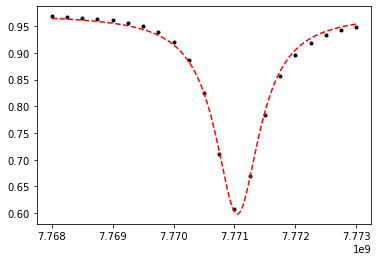

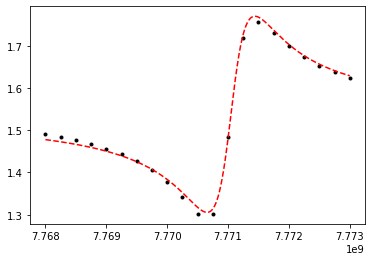

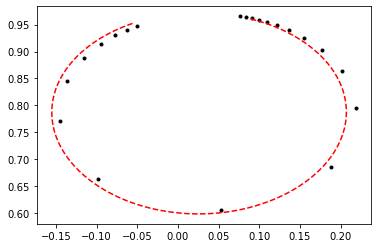

In [37]:
resonator_fit(freqs, s11, p0=[7.771e9, 5000, 1, 0,0], func=pp.linear_resonator_offset)

array([ 7.57689000e+09,  8.50885159e+03,  2.05259764e-01, -1.08967515e-01,
       -1.20623031e+00])

<Figure size 432x288 with 0 Axes>

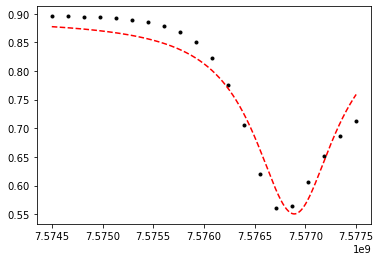

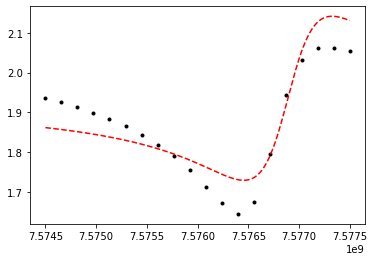

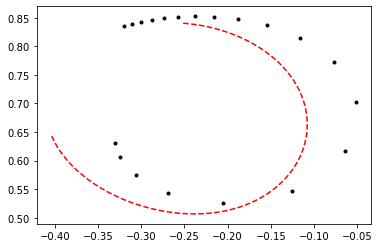

In [47]:
resonator_fit(freqs, s11, p0=[7.57655e9, 5000, 0.1, 0, 0], func=pp.linear_resonator_offset)

array([7.57705926e+09, 4.15646985e+03, 2.46132720e-01, 5.14626565e+00])

<Figure size 432x288 with 0 Axes>

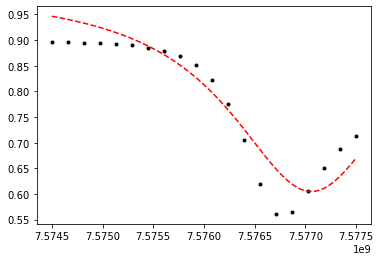

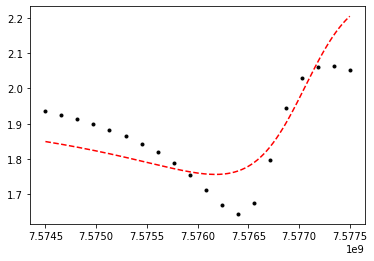

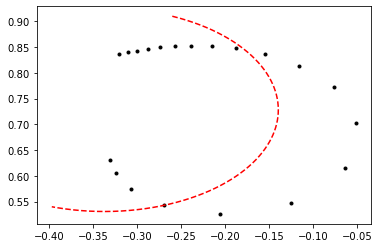

In [52]:
resonator_fit(freqs, s11, p0=[7.57655e9, 5000, 0.1, 5], func=pp.linear_resonator_rotated)

0
[ 7.57684505e+09  9.28019486e+03  1.89513903e-01 -1.13312766e-01
 -1.21190595e+00  1.78198671e-09]
1
[ 7.57670965e+09  1.11998806e+04  1.51967164e-01 -1.37004883e-01
 -2.24421272e+00  9.99999940e-01]
2
[ 7.57610865e+09  4.77269705e+03 -1.73966414e-02 -9.55356148e-01
 -5.16932803e-01  2.00000000e+00]
3
[ 3.64649325e+09  7.12508581e+08 -5.75970397e+08 -1.75480341e+00
  1.84426195e+01  3.00055290e+00]
4
[ 7.57676364e+09 -1.25980122e+03  7.01427206e-02 -9.68229161e-02
  9.97923069e-01  4.00000014e+00]
5
[ 7.57697838e+09  6.23735050e+03  1.01832031e-01 -8.96834201e-02
  1.74268554e-02  5.00000000e+00]


C:\Users\tajdy\AppData\Local\Temp/ipykernel_9760/1090561486.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

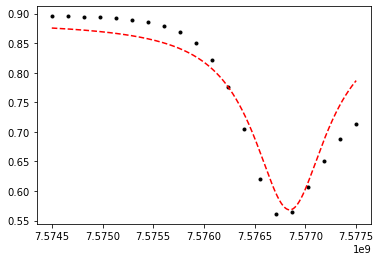

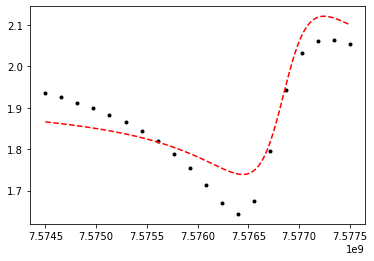

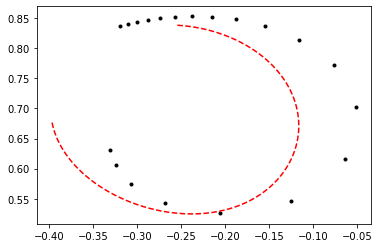

<Figure size 432x288 with 0 Axes>

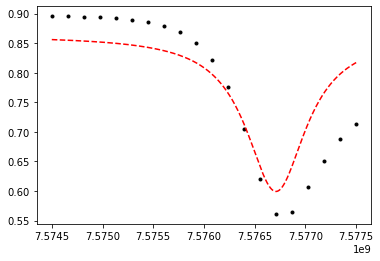

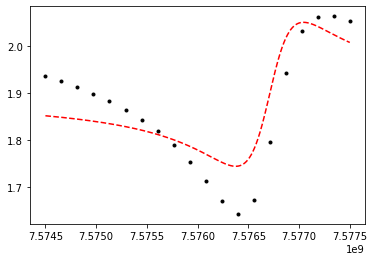

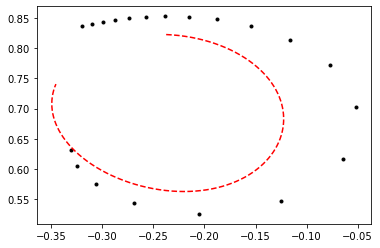

<Figure size 432x288 with 0 Axes>

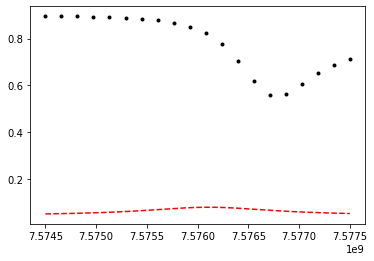

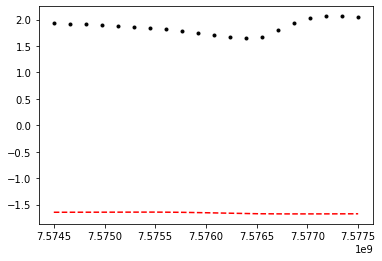

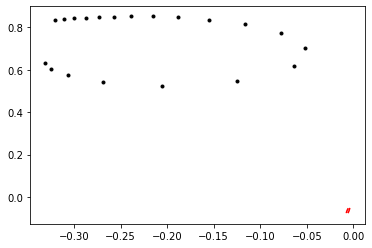

<Figure size 432x288 with 0 Axes>

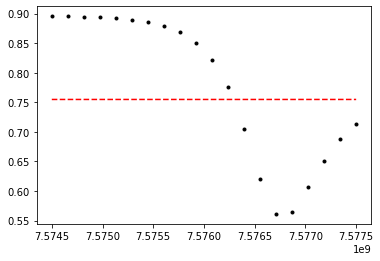

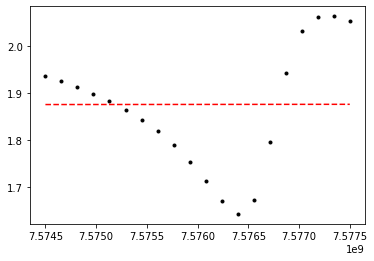

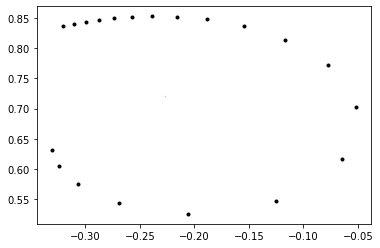

<Figure size 432x288 with 0 Axes>

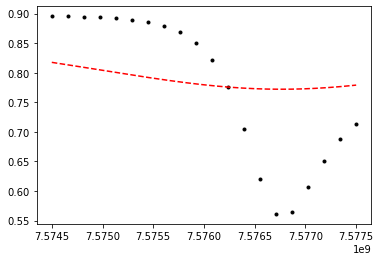

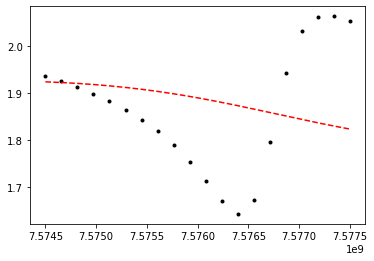

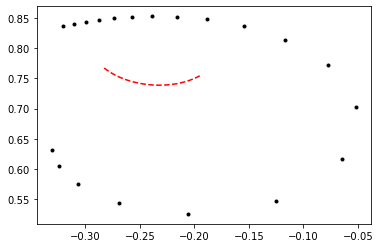

<Figure size 432x288 with 0 Axes>

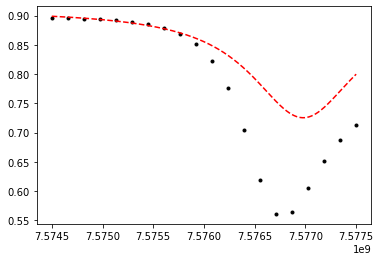

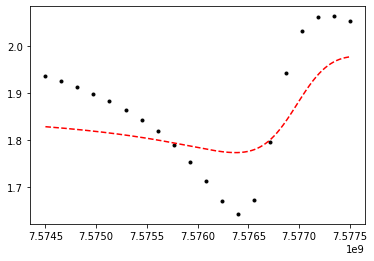

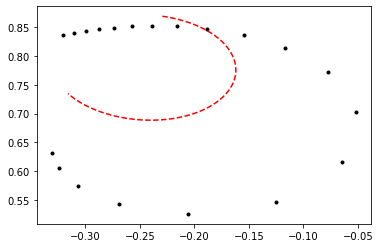

In [69]:
for phi in range(6):
    print(phi)
    print(resonator_fit(freqs, s11, p0=[7.57655e9, 5000, 0.1, 0, 0, 0], func=pp.linear_resonator_rotated_offset))

array([ 7.57687882e+09,  8.92507528e+03,  2.08251056e-01, -1.10576194e-01,
       -2.06347512e+05,  2.06346303e+05])

<Figure size 432x288 with 0 Axes>

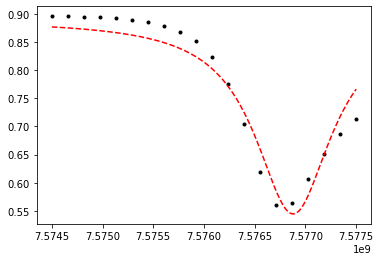

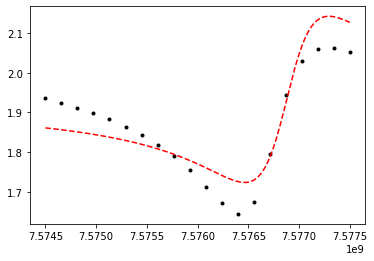

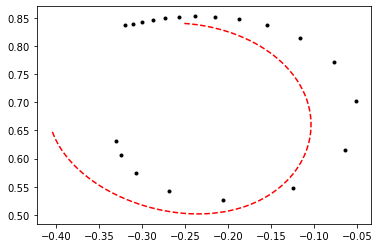

In [82]:
resonator_fit(freqs, s11, p0=[7.57655e9, 5000, 0.1, 0, 0, 0], func=pp.linear_resonator_rotated_offset)

[ 7.57686123e+09  7.88749196e+03  1.98158536e-01 -1.14714567e-01
  1.26988245e+05 -1.26983223e+05]


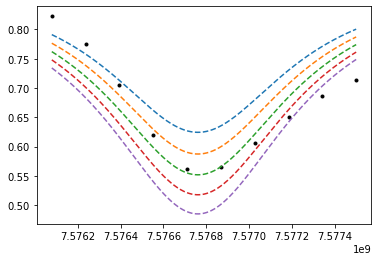

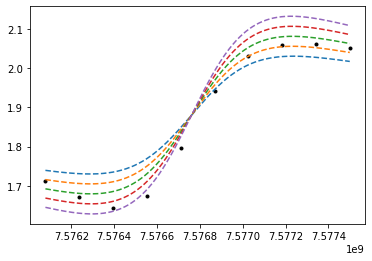

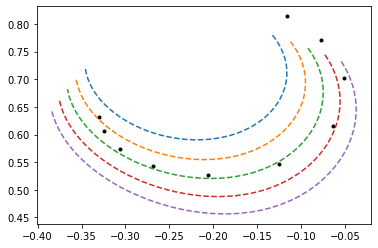

In [28]:
popt = resonator_fit(freqs[10:], s11[10:], [7.57655e9, 5000, 0.1, 0, 0, 5], plot=False)
smooth_f = np.linspace(freqs[10], freqs[-1], 1000)
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
plot_complex(freqs[10:], s11[10:], axs=axs)
print(popt)
N = 5
fmts = [f'C{i}--' for i in range(N)]
popt[0] -= 0.0001e9
for i,beta in enumerate(np.linspace(0.15, 0.25, N)):
    popt[2] = beta
    plot_complex(smooth_f, pp.linear_resonator_rotated_offset(smooth_f, *popt), fmt=fmts[i], axs=axs)

In [ ]:
pp.plot_s11(freqs, s11, fit=True)
plt.show()

7576890853.877033 5812.826649991461 0.2546849396412064


<Figure size 432x288 with 0 Axes>

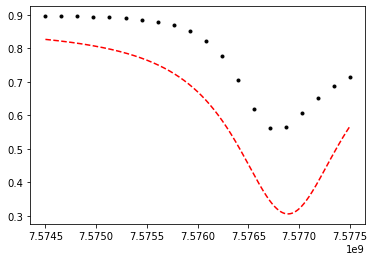

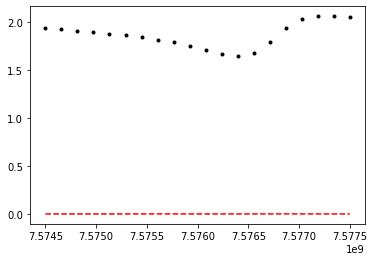

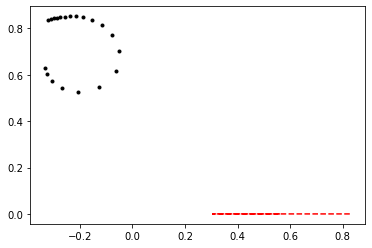

In [45]:
popt, pcov = pp.sidecar_fit_reflection(freqs, s11)
plot_data_fit(freqs, s11, pp.func_sc_pow_reflected, popt)

In [4]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230311_Al_50z_S11_complex_hires.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


array([-0.00948   ,  8.24343333])

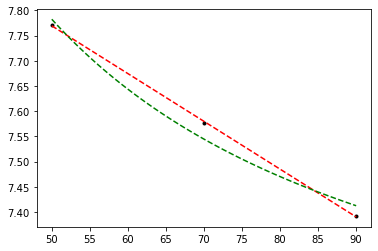

In [96]:
def inverse(x, a, b):
    return a/x+b

freqs = [7.7710, 7.5767, 7.3918]
heights = [50, 70, 90]

p = np.polyfit(heights, freqs, 1)
popt, pcov = curve_fit(inverse, heights, freqs)
plt.plot(heights, freqs, 'k.')
plt.plot(heights, np.polyval(p, heights), 'r--')
s = np.linspace(heights[0], heights[-1], 100)
plt.plot(s, inverse(s, *popt), 'g--')
p